In [2]:
import pathlib as pl
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sympy as sp
import mahotas
%matplotlib inline
sp.init_printing()

In [3]:
# Size for large photo displays; halve for small/side-by-side photos
# Ratio for photos is 5:3
# plt.rcParams['figure.figsize'] = (30, 50)
plt.rcParams['figure.figsize'] = (40, 24)

For the first step of the Build phase, I will examine the photos for quality and consistency to ensure I can perform all image processing required for computer vision and photogrammetry operations. This includes:
* Examining image matrix operations
* Setting up a calibration collection



In [4]:
original_main = [str(photo) for photo in sorted(pl.Path('../data/original_main').glob('*.jpg'))]
original_midspan = [str(photo) for photo in sorted(pl.Path('../data/original_midspan').glob('*.jpg'))]
annotated_main = [str(photo) for photo in sorted(pl.Path('../data/annotated_main').glob('*.jpg'))]
annotated_midspan = [str(photo) for photo in sorted(pl.Path('../data/annotated_midspan').glob('*.jpg'))]

In [18]:
sample_main = cv2.imread(original_main[0])
sample_main_gray = cv2.cvtColor(sample_main, cv2.COLOR_BGR2GRAY)
sample_midspan = cv2.imread(original_midspan[1])
sample_midspan_gray = cv2.cvtColor(sample_main, cv2.COLOR_BGR2GRAY)
sample_main_blurred = cv2.GaussianBlur(sample_main_gray, (11, 11), 0)
sample_midspan_blurred = cv2.GaussianBlur(sample_midspan_gray, (11, 11), 0)

## Edge Detection

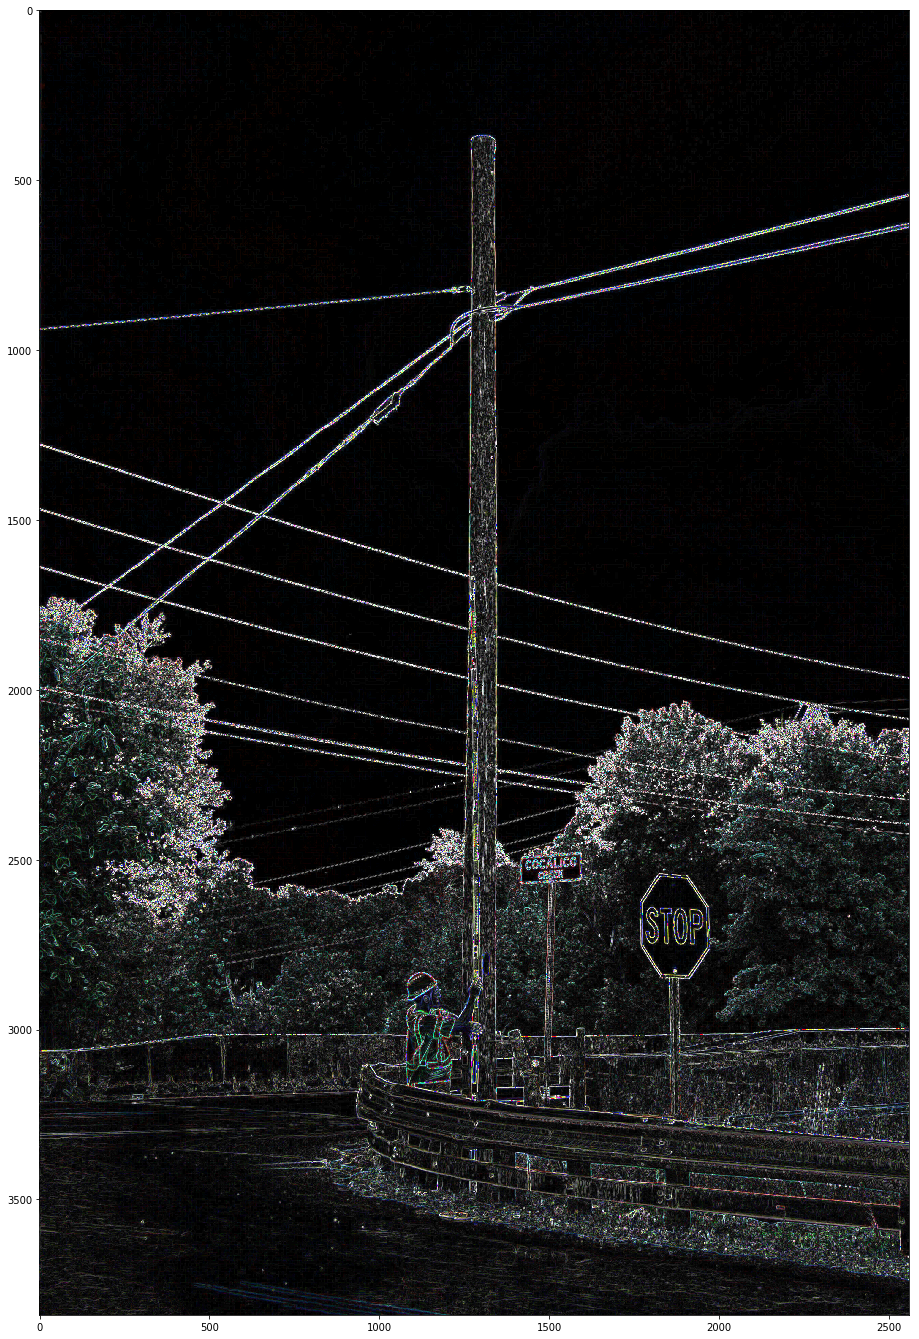

In [11]:
sobelX = cv2.Sobel(sample_main, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(sample_main, cv2.CV_64F, 0, 1)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

_ = plt.imshow(sobelCombined)

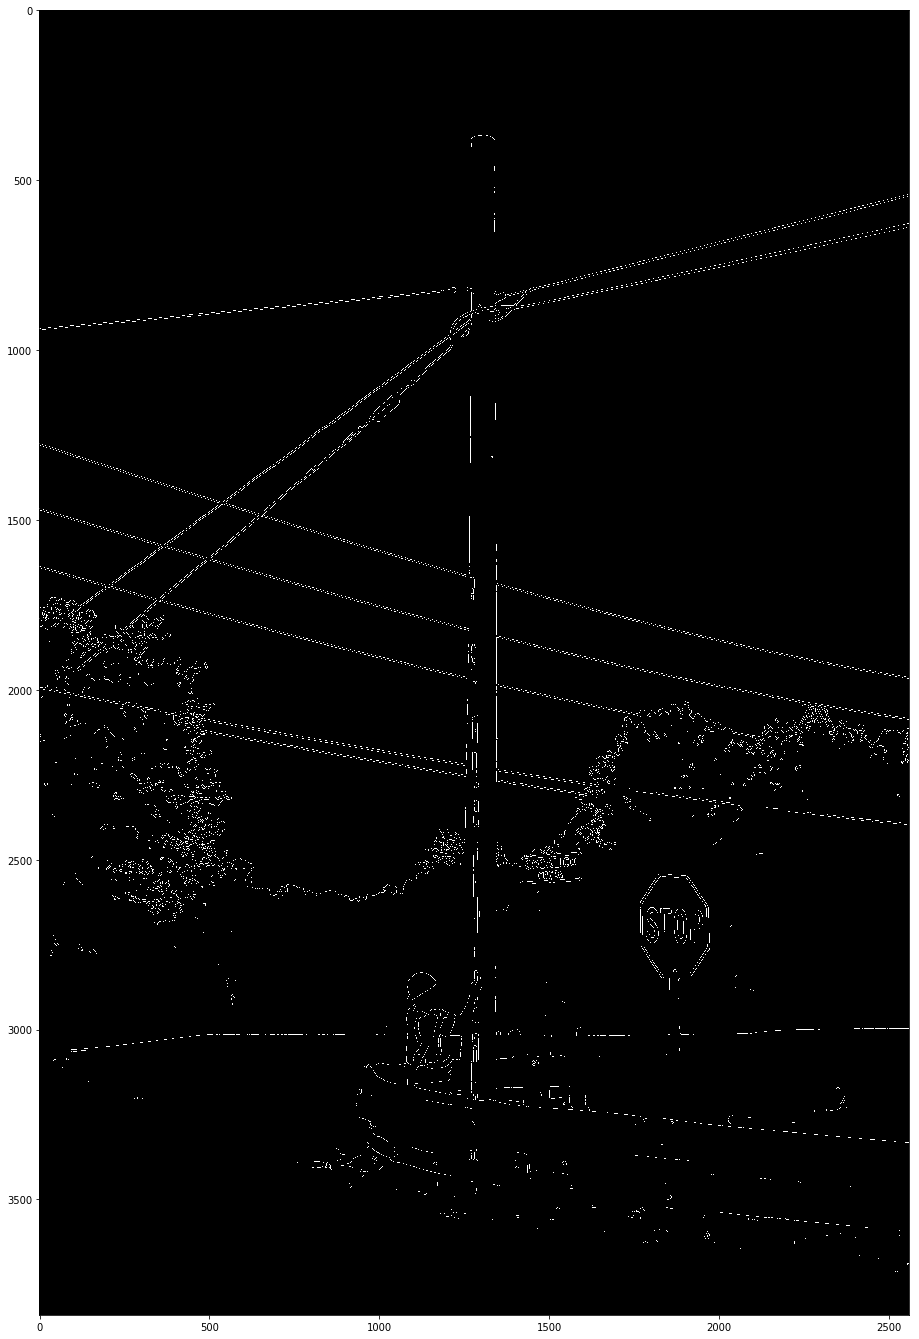

In [22]:
canny = cv2.Canny(sample_main_blurred, 70, 100)
_ = plt.imshow(cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR))